# Examine NHS GPs - Appendix - using GPs by GP Practices data (epracmem)
### Three important takeaways:

- Any recent practitioners entering/ leaving can screw up patients-per-practitioner in the short-run. In **section A** down below, we found that the results from using data excluding any observations with recent practitioners entering/ leaving are extremely similar to the results we have in the report using all observations.
- If we define the improvement/ decline in ratings for a practice to be the difference in its three-month (or twelve-month) average rating right before the practitioner left/ joined and its three-month average rating 3 months (or 1 year) before the practitioner left/ joined, the results will still be similar to the result in the report where we use changes in six-month average ratings to measure the improvement/ decline in ratings. This is shown in **section B**.
- If we define the increase/ decrease in patients-per-practitioner for a practice to be the difference in its patients-per-practitioner right before the practitioners left/ joined and its patients-per-practitioner 3, 12 or 18 months (instead of 6 months which is used in the report) before the practitioner left/ joined, the results will be extremely similar to the results in the report. This is shown in **section C**.

***
***

**Reading in the raw data**

In [1]:
import practitioner_leave_writeup, practitioner_leave
import pandas as pd
enrollment = pd.read_stata("Data/Existing/Enrollment/gp_enrollment.dta")
practitioners = pd.read_csv("Data/epracmem/epracmem.csv", header = None, parse_dates = ["join_parent_date", "left_parent_date"],
                names = ["practitioner_code", "org_code", "parent_type", "join_parent_date", "left_parent_date", "amended"])
reviews = pd.read_stata("Data/Existing/Ratings/gp_reviews_combined.dta")
mergers = pd.read_stata("Data/Existing/Mergers/gp_mergers.dta")
geocode = pd.read_stata("Data/Existing/Geo/gp_practices_geocoded.dta")

**Data with all observations**

In [2]:
leaves_panel = practitioner_leave.make_leaves_panel(practitioners, mergers)
ratings_compare = practitioner_leave.make_ratings(leaves_panel, reviews, offset_months = 24)
patients_per_practitioner = practitioner_leave.make_patients_per_practitioner(practitioners, leaves_panel, enrollment)

**Data without observations that have any practitioners joining in or leaving during the past 6 months**

In [3]:
leaves_panel_6mon = practitioner_leave.make_leaves_panel(practitioners, mergers, drop_recent_joined_left = True,
                                                         drop_recent_joined_left_months = 6)
ratings_compare_6mon = practitioner_leave.make_ratings(leaves_panel_6mon, reviews, offset_months = 24)
patients_per_practitioner_6mon = practitioner_leave.make_patients_per_practitioner(practitioners,
                                                                                   leaves_panel_6mon, enrollment)

**Data without observations that have any practitioners joining in or leaving during the past 12 months**

In [4]:
leaves_panel_12mon = practitioner_leave.make_leaves_panel(practitioners, mergers, drop_recent_joined_left = True,
                                                          drop_recent_joined_left_months = 12)
ratings_compare_12mon = practitioner_leave.make_ratings(leaves_panel_12mon, reviews, offset_months = 24)
patients_per_practitioner_12mon = practitioner_leave.make_patients_per_practitioner(practitioners,
                                                                                    leaves_panel_12mon, enrollment)

***
***

## A. Should we exclude observations that have recent practitioners entering/ leaving? Any practitioner enterings/ leavings can screw up the numbers in the short-run.

- The results from using data excluding any observations with recent practitioners entering/ leaving are extremely similar to the results using all observations.

### PART I: Data excluding observations that have any practitioners joining in or leaving during the previous 6 months


- 53.16% of the old/ new rating pairs fall above the 45-degree line.
These are the practitioners who switched to practices with higher ratings.

- 1.92% of the pairs fall on the 45-degree line.
These are the practitioners who switched to practices with the same ratings.

- 44.93% of the pairs fall below the 45-degree line.
These are the practitioners who switched to practices with lower ratings.




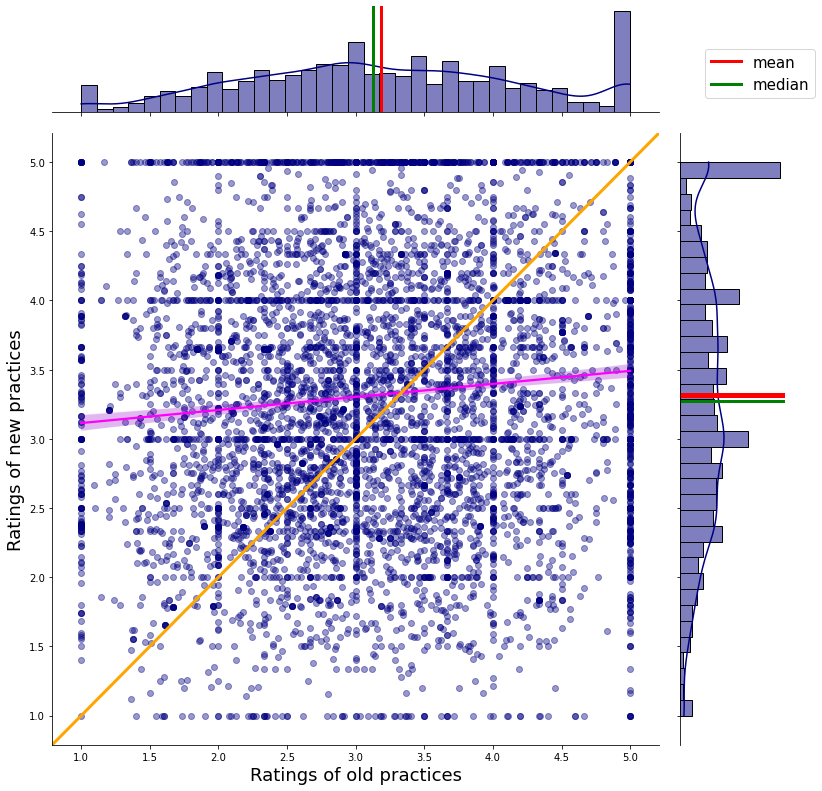

In [5]:
practitioner_leave_writeup.jointplot_ratings(ratings_compare_6mon)


- 54.69% (winsorized)/ 58.77% (original) of the old/ new patients-per-practitioner pairs fall above the 45-degree line.
These are the practitioners who switched to practices with more patients-per-practitioner.

- 9.17% (winsorized)/ 0.0% (original) of the pairs fall on the 45-degree line.
These are the practitioners who switched to practices with the same amount of patients-per-practitioner.

- 36.15% (winsorized)/ 41.23% (original) of the pairs fall below the 45-degree line.
These are the practitioners who switched to practices with fewer patients-per-practitioner.

- The average percentage increase in patients-per-practitioner after the switch is 10.49% (winsorized)/ 15.47% (original).
- The formula here: mean (new - old) / mean old
That is, practitioners moved to new practices that were on average 10.49% (winsorized)/ 15.47% (original) more busy/ successful.




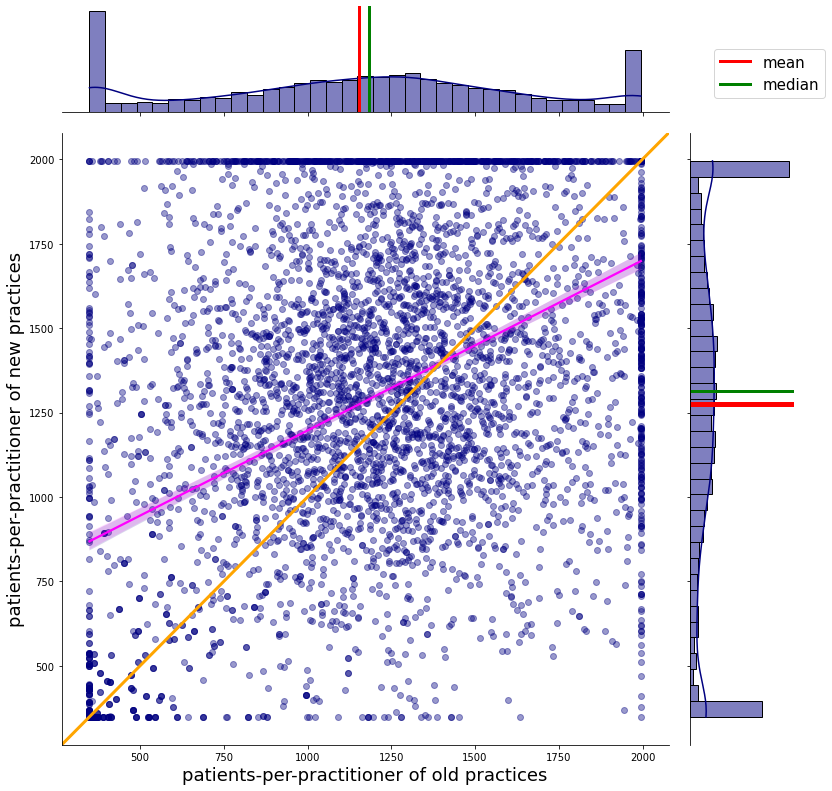

In [6]:
practitioner_leave_writeup.jointplot_patients_per_practitioner(patients_per_practitioner_6mon)

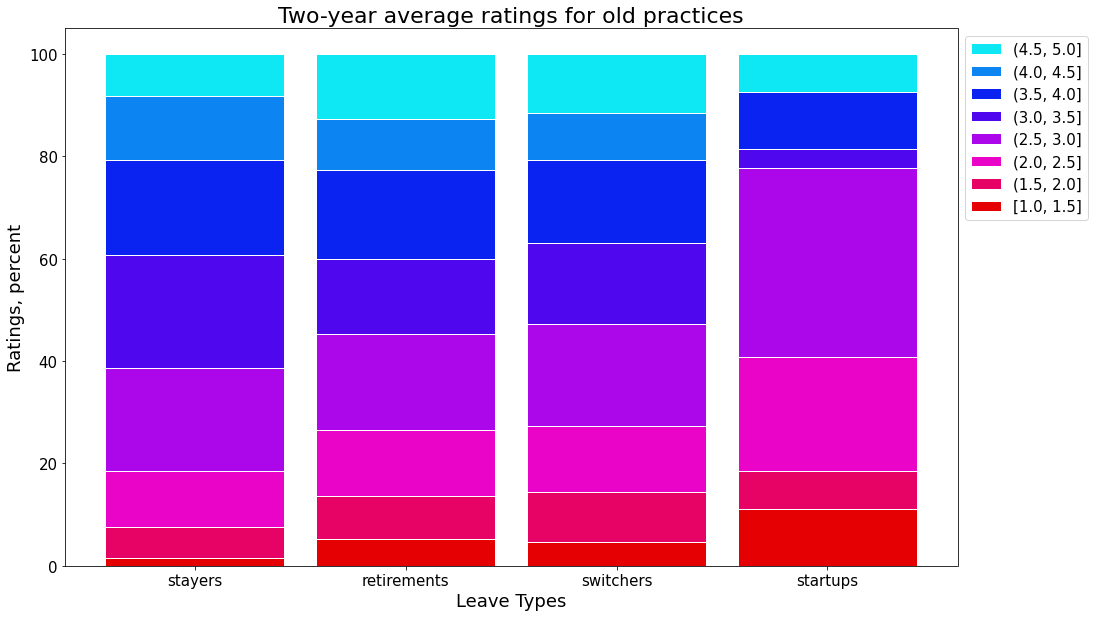

In [7]:
practitioner_leave_writeup.hist_old_ratings(leaves_panel_6mon, practitioners, reviews)

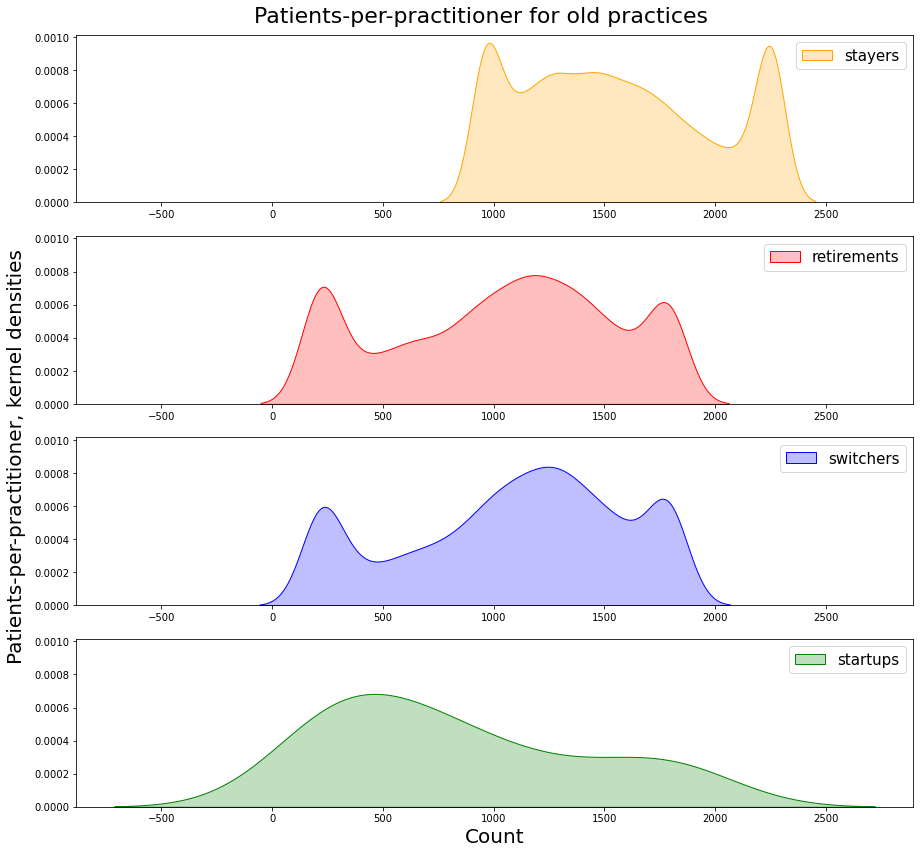

In [8]:
practitioner_leave_writeup.hist_old_patients_per_practitioner(practitioners, leaves_panel_6mon, enrollment, geocode,
                                                              random_state = 8)


- 35.28% of the pairs fall above the 45-degree line.

- 1.81% of the pairs fall on the 45-degree line.

- 62.91% of the pairs fall below the 45-degree line.




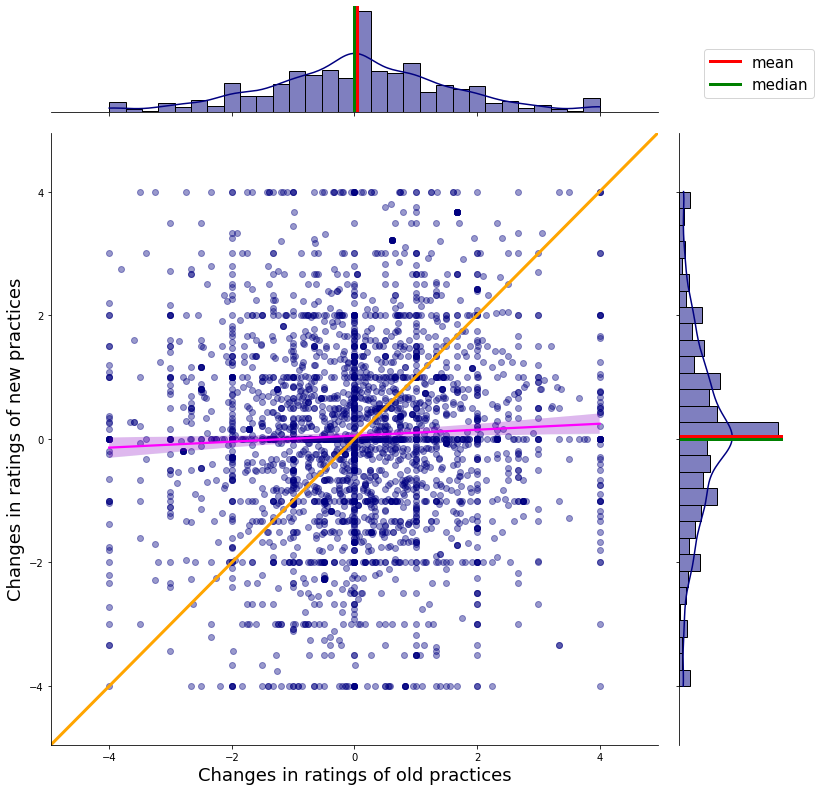

In [9]:
practitioner_leave_writeup.jointplot_ratings_growth(leaves_panel_6mon, reviews, offset_months_1 = 6, offset_months_2 = 12)


- 53.47% (winsorized)/ 54.96% (original) of the old/ new patients-per-practitioner growth pairs fall above the 45-degree line.

- 8.03% (winsorized)/ 0.02% (original) of the pairs fall on the 45-degree line.

- 38.5% (winsorized)/ 45.02% (original) of the pairs fall below the 45-degree line.




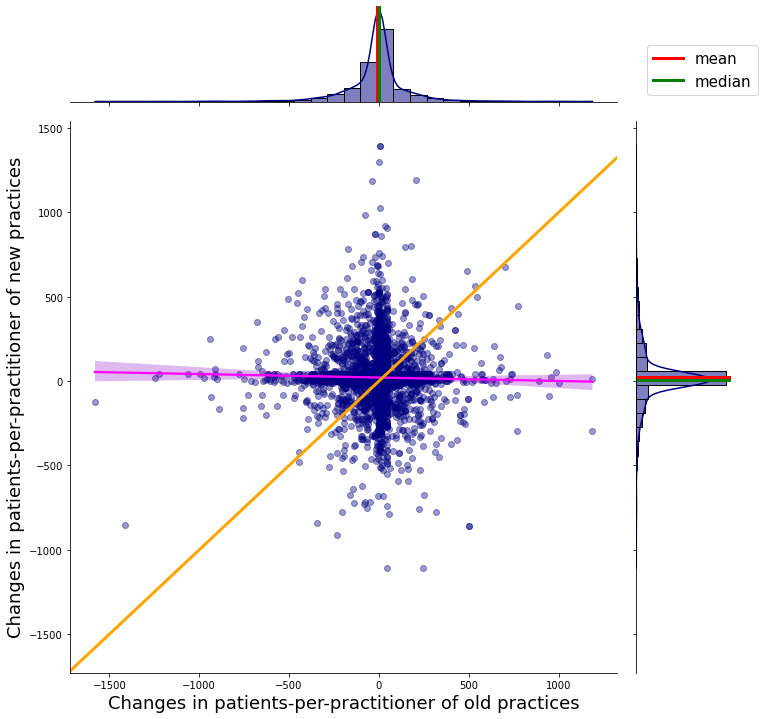

In [10]:
practitioner_leave_writeup.jointplot_patients_per_practitioner_growth(leaves_panel_6mon, practitioners, enrollment,
                                                                      offset_months = 6)

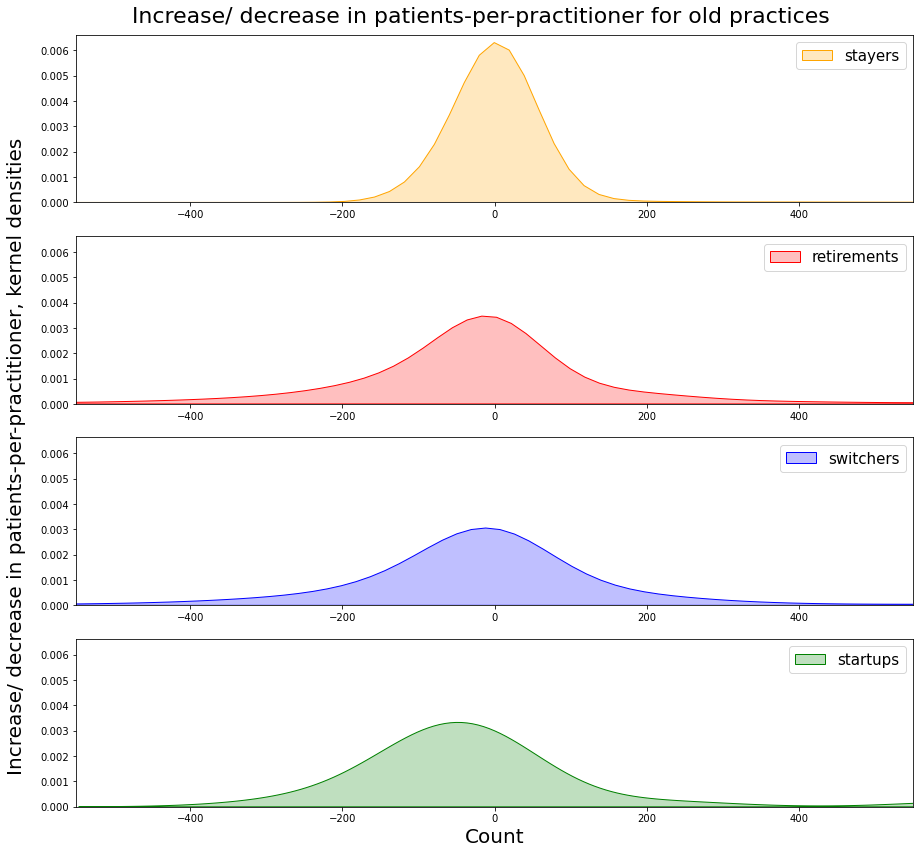

In [11]:
practitioner_leave_writeup.hist_old_patients_per_practitioner_growth(practitioners, leaves_panel_6mon, enrollment, geocode,
                                                                     random_state = 8, offset_months = 6)

### PART II: Data excluding observations that have any practitioners joining in or leaving during the previous 12 months


- 53.24% of the old/ new rating pairs fall above the 45-degree line.
These are the practitioners who switched to practices with higher ratings.

- 1.99% of the pairs fall on the 45-degree line.
These are the practitioners who switched to practices with the same ratings.

- 44.77% of the pairs fall below the 45-degree line.
These are the practitioners who switched to practices with lower ratings.




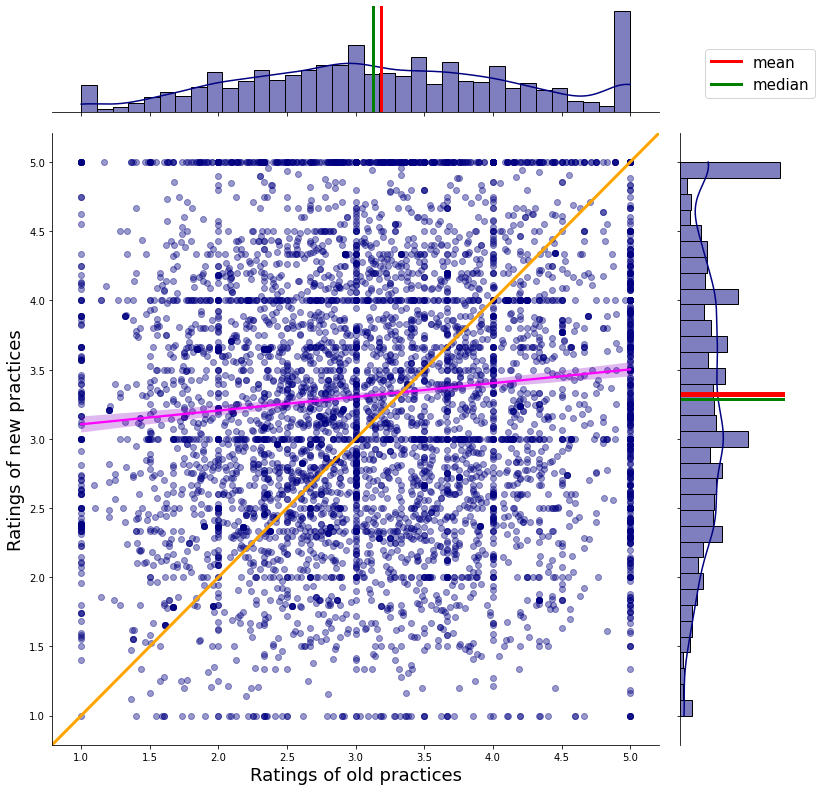

In [12]:
practitioner_leave_writeup.jointplot_ratings(ratings_compare_12mon)


- 54.61% (winsorized)/ 58.76% (original) of the old/ new patients-per-practitioner pairs fall above the 45-degree line.
These are the practitioners who switched to practices with more patients-per-practitioner.

- 9.16% (winsorized)/ 0.0% (original) of the pairs fall on the 45-degree line.
These are the practitioners who switched to practices with the same amount of patients-per-practitioner.

- 36.22% (winsorized)/ 41.24% (original) of the pairs fall below the 45-degree line.
These are the practitioners who switched to practices with fewer patients-per-practitioner.

- The average percentage increase in patients-per-practitioner after the switch is 10.8% (winsorized)/ 15.75% (original).
- The formula here: mean (new - old) / mean old
That is, practitioners moved to new practices that were on average 10.8% (winsorized)/ 15.75% (original) more busy/ successful.




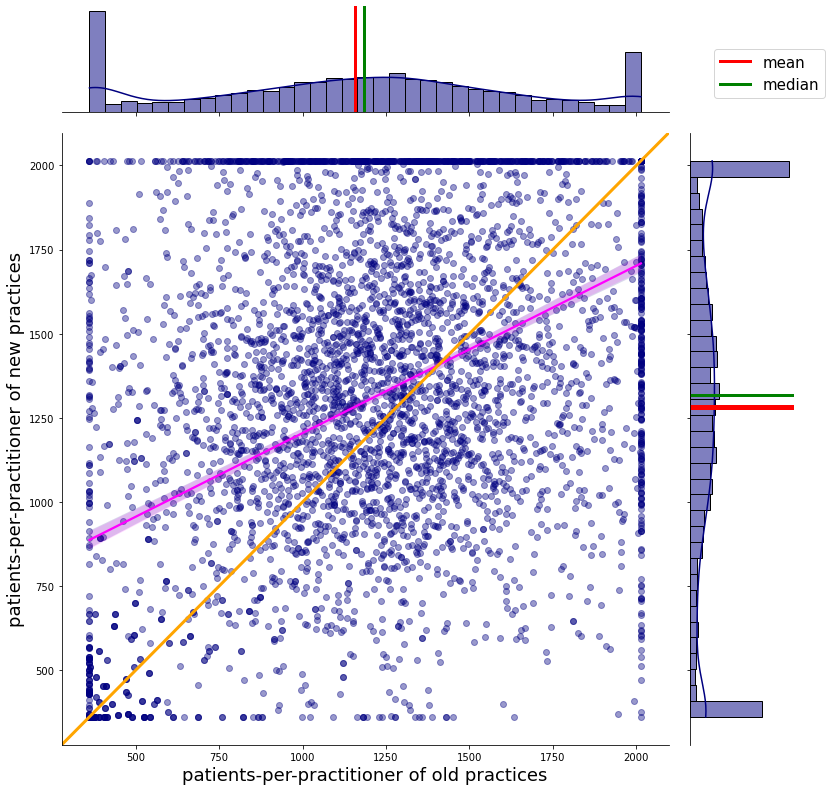

In [13]:
practitioner_leave_writeup.jointplot_patients_per_practitioner(patients_per_practitioner_12mon)

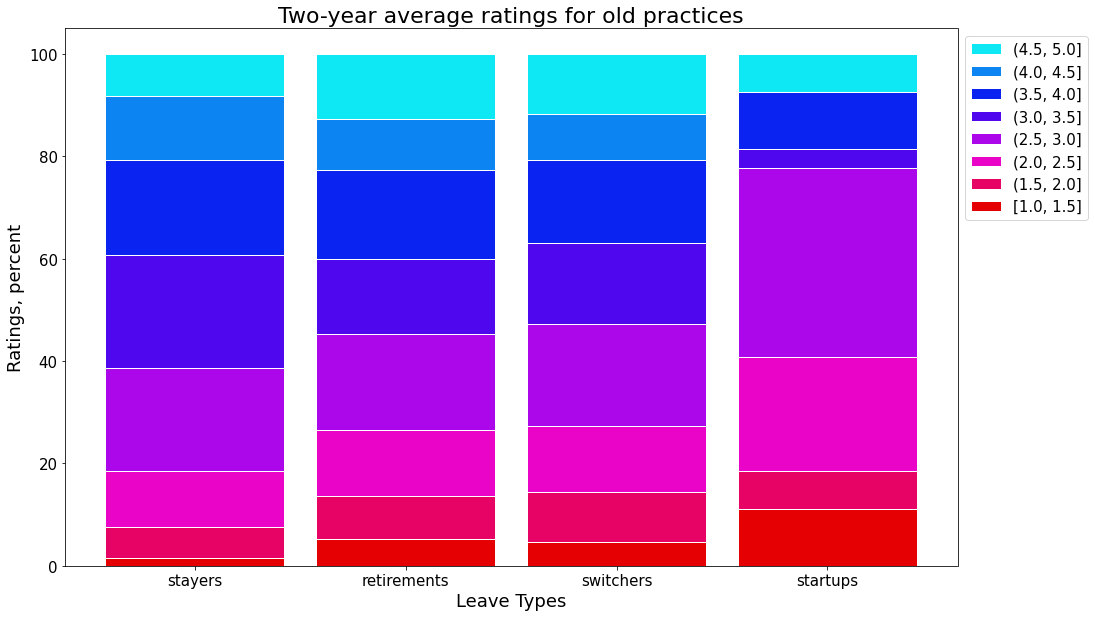

In [14]:
practitioner_leave_writeup.hist_old_ratings(leaves_panel_12mon, practitioners, reviews)

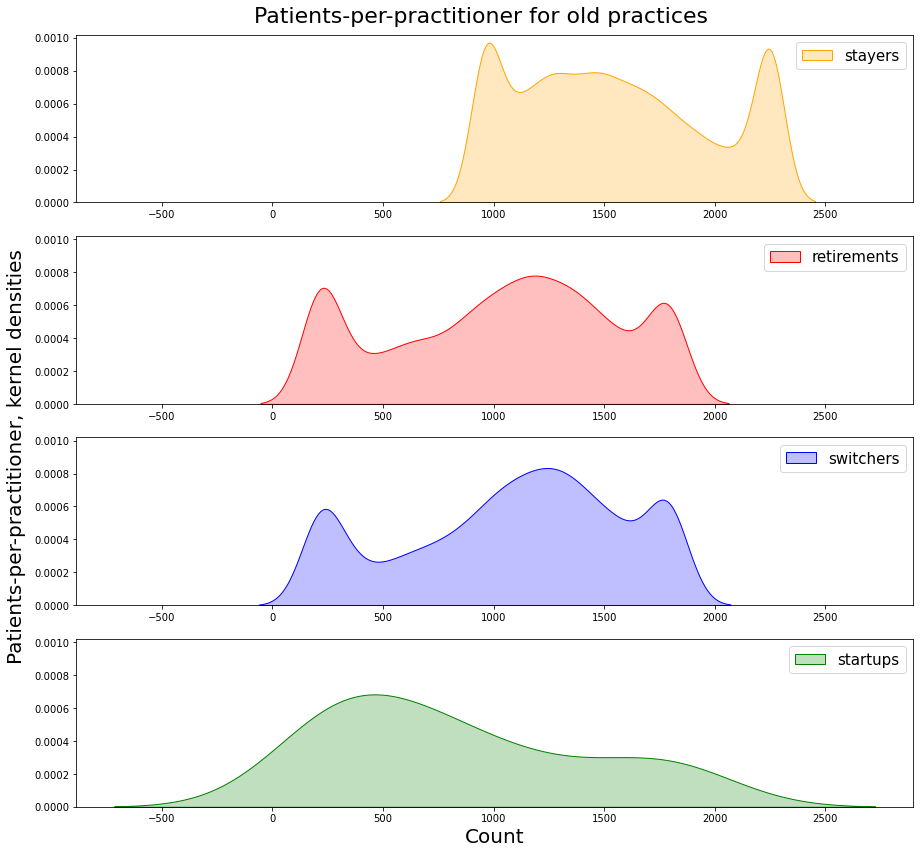

In [15]:
practitioner_leave_writeup.hist_old_patients_per_practitioner(practitioners, leaves_panel_12mon, enrollment, geocode,
                                                              random_state = 8)


- 35.21% of the pairs fall above the 45-degree line.

- 1.79% of the pairs fall on the 45-degree line.

- 63.0% of the pairs fall below the 45-degree line.




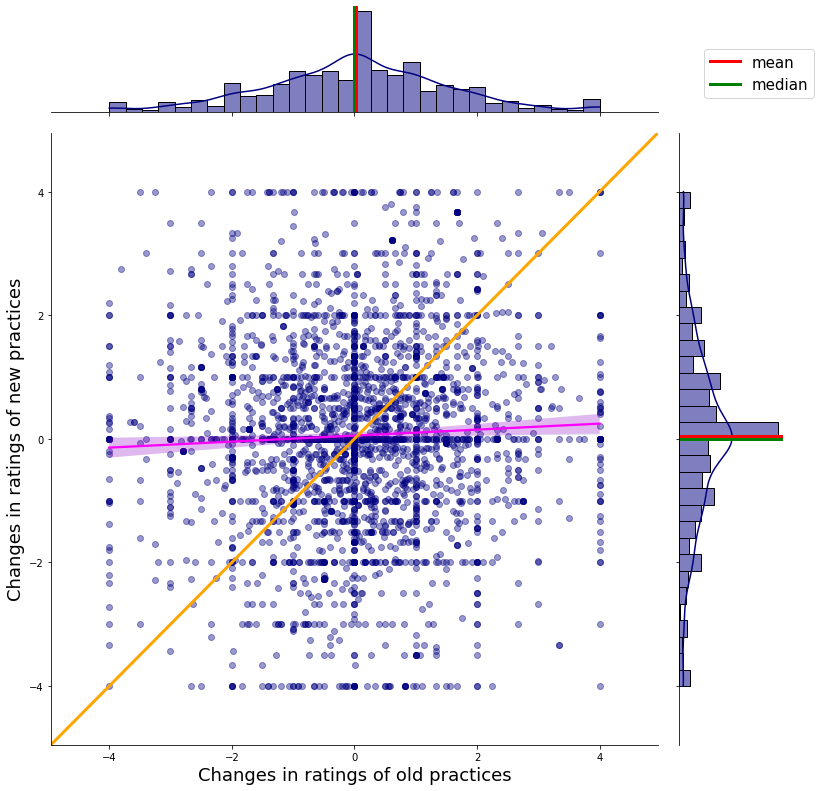

In [16]:
practitioner_leave_writeup.jointplot_ratings_growth(leaves_panel_12mon, reviews, offset_months_1 = 6, offset_months_2 = 12)


- 53.56% (winsorized)/ 55.16% (original) of the old/ new patients-per-practitioner growth pairs fall above the 45-degree line.

- 7.77% (winsorized)/ 0.03% (original) of the pairs fall on the 45-degree line.

- 38.67% (winsorized)/ 44.81% (original) of the pairs fall below the 45-degree line.




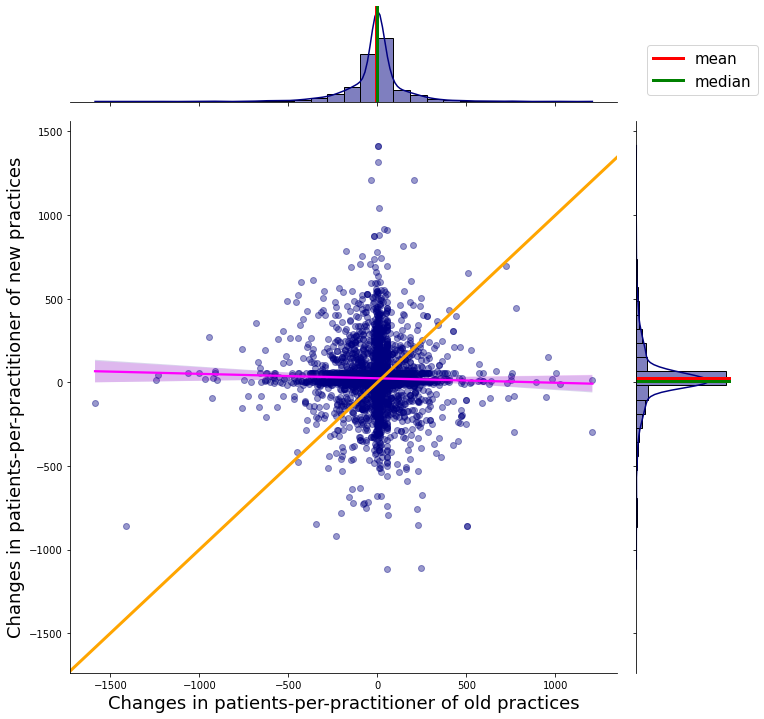

In [17]:
practitioner_leave_writeup.jointplot_patients_per_practitioner_growth(leaves_panel_12mon, practitioners, enrollment,
                                                                      offset_months = 6)

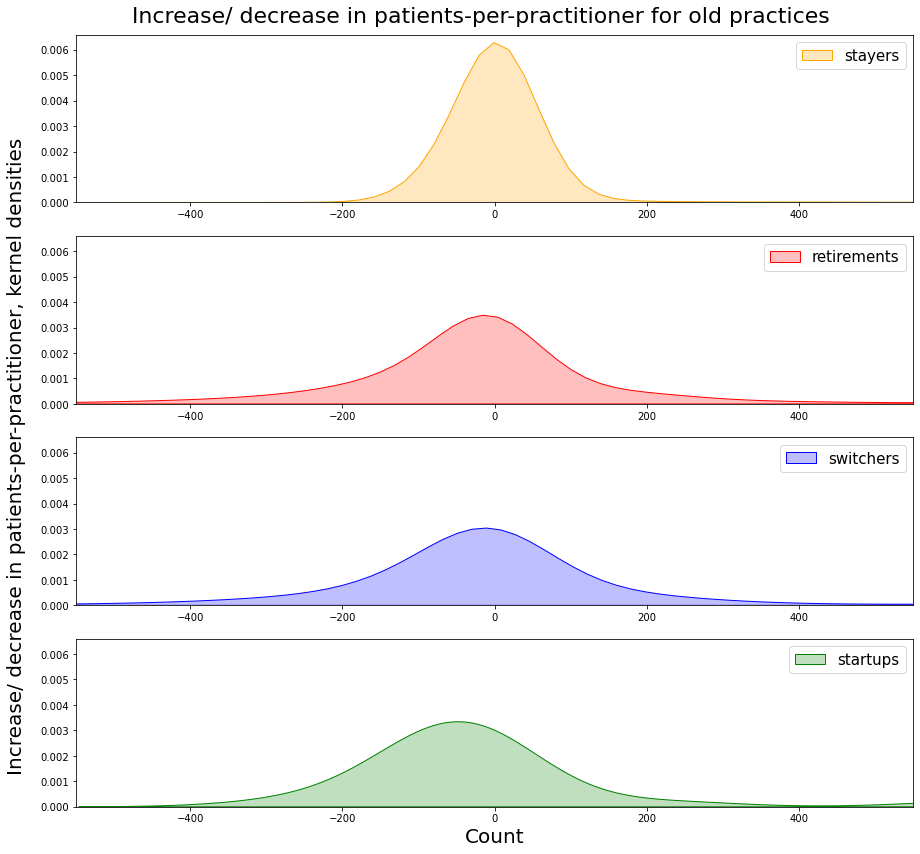

In [18]:
practitioner_leave_writeup.hist_old_patients_per_practitioner_growth(practitioners, leaves_panel_12mon, enrollment, geocode,
                                                                     random_state = 8, offset_months = 6)

***
***

## B. When calculating the improvement/ decline in average ratings before practitioners left/ joined, will the results be different if we change the interval of average ratings.
### For example, what if we define the improvement/ decline in ratings for a practice to be the difference in its three-month average rating right before the practitioner left/ joined and its three-month average rating 3 months before the practitioner left/ joined?
- The result here is similar to the result in the report using changes in six-month average ratings.
- Only 26.4% of the practitioners actually moved from practices with decreasing ratings to practices with increasing ratings.
- The sample size here will be much smaller than the sample size when using six-month average ratings.


- 26.41% of the pairs fall above the 45-degree line.

- 2.87% of the pairs fall on the 45-degree line.

- 70.72% of the pairs fall below the 45-degree line.




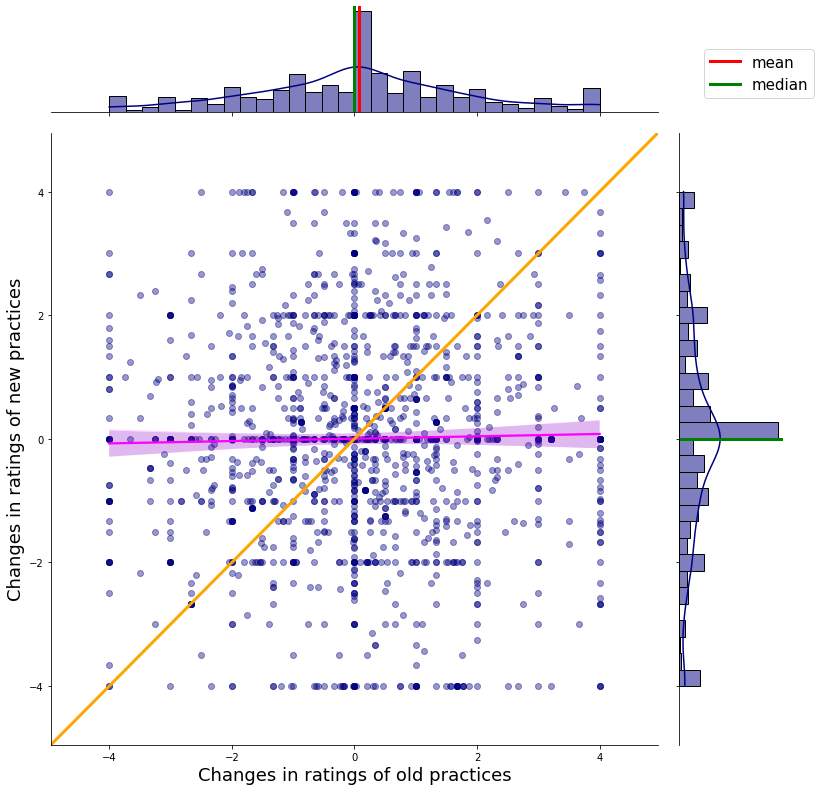

In [19]:
practitioner_leave_writeup.jointplot_ratings_growth(leaves_panel, reviews, offset_months_1 = 3, offset_months_2 = 6)

### What if we define the improvement/ decline in ratings for a practice to be the difference in its twelve-month average rating right before the practitioner left/ joined and its twelve-month average rating 1 year before the practitioner left/ joined?
- The results here are similar to the results in the report using changes in six-month average ratings.


- 42.19% of the pairs fall above the 45-degree line.

- 0.85% of the pairs fall on the 45-degree line.

- 56.96% of the pairs fall below the 45-degree line.




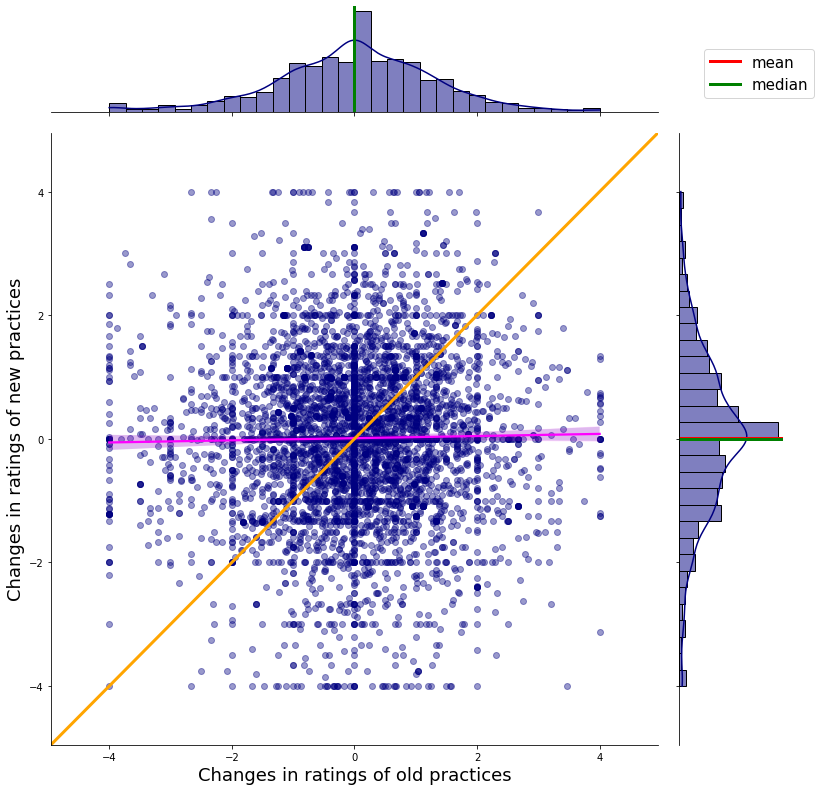

In [20]:
practitioner_leave_writeup.jointplot_ratings_growth(leaves_panel, reviews, offset_months_1 = 12, offset_months_2 = 24)

***
***

## C. Will the results be different if we define the increase/ decrease in patients-per-practitioner for a practice to be the difference in its patients-per-practitioner right before the practitioners left/ joined and its patients-per-practitioner 3, 12 or 18 months (instead of 6 months which is used in the report) before the practitioner left/ joined?
- Either using 3, 12, or 18 months, the results are extremely similar to the results in the report using 6 months.

### The case of using 3 months


- 51.39% (winsorized)/ 53.56% (original) of the old/ new patients-per-practitioner growth pairs fall above the 45-degree line.

- 8.37% (winsorized)/ 0.09% (original) of the pairs fall on the 45-degree line.

- 40.24% (winsorized)/ 46.36% (original) of the pairs fall below the 45-degree line.




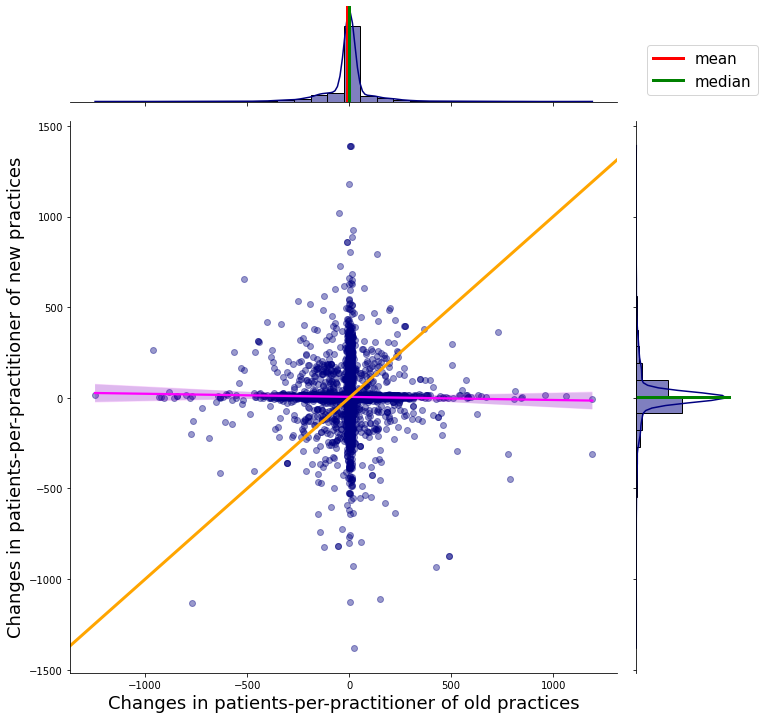

In [21]:
practitioner_leave_writeup.jointplot_patients_per_practitioner_growth(leaves_panel, practitioners,
                                                                      enrollment, offset_months = 3)

### The case of using 12 months


- 54.76% (winsorized)/ 57.24% (original) of the old/ new patients-per-practitioner growth pairs fall above the 45-degree line.

- 7.75% (winsorized)/ 0.0% (original) of the pairs fall on the 45-degree line.

- 37.49% (winsorized)/ 42.76% (original) of the pairs fall below the 45-degree line.




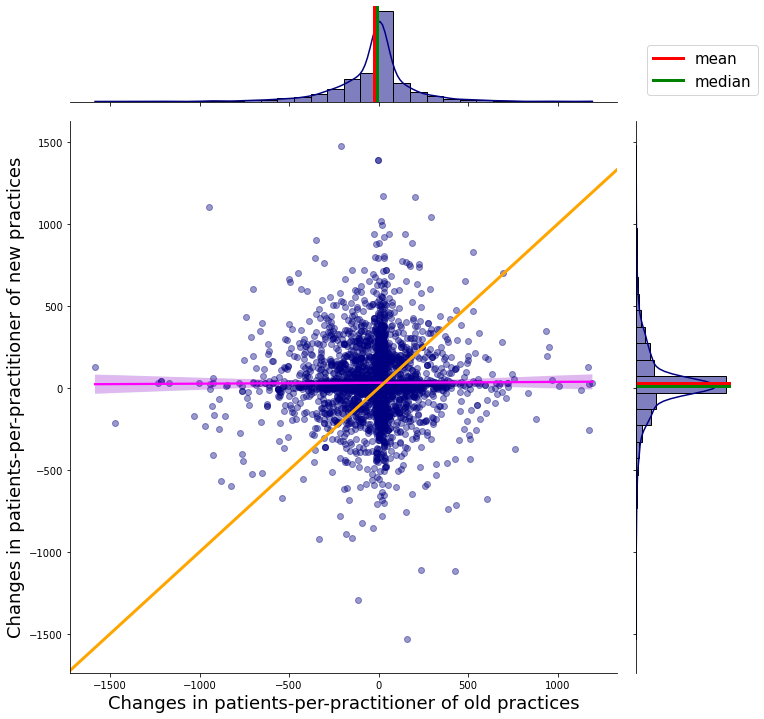

In [22]:
practitioner_leave_writeup.jointplot_patients_per_practitioner_growth(leaves_panel, practitioners,
                                                                      enrollment, offset_months = 12)

### The case of using 18 months


- 55.02% (winsorized)/ 58.11% (original) of the old/ new patients-per-practitioner growth pairs fall above the 45-degree line.

- 7.85% (winsorized)/ 0.0% (original) of the pairs fall on the 45-degree line.

- 37.13% (winsorized)/ 41.89% (original) of the pairs fall below the 45-degree line.




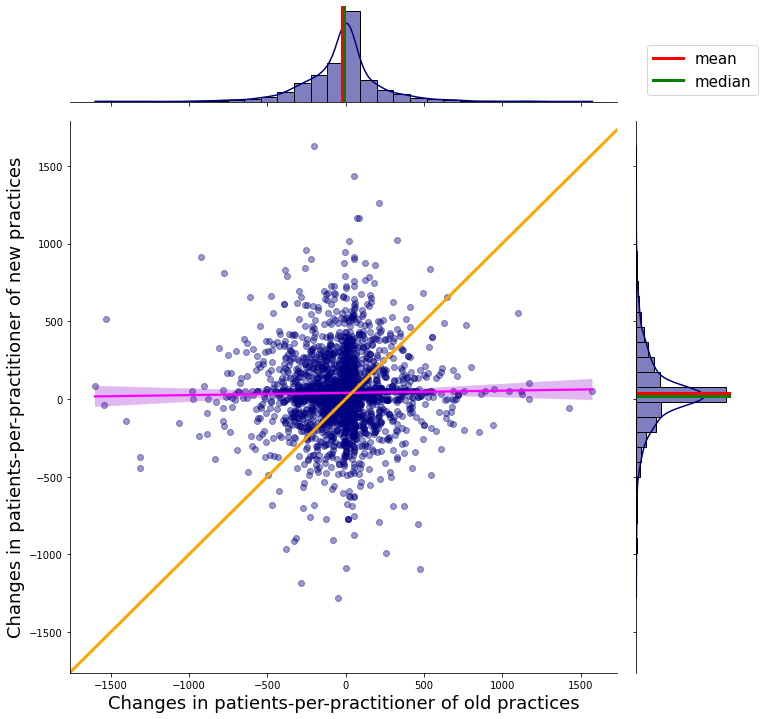

In [23]:
practitioner_leave_writeup.jointplot_patients_per_practitioner_growth(leaves_panel, practitioners,
                                                                      enrollment, offset_months = 18)

***
***